# Advection on a graph

Consider the advection equation

\begin{equation}
    \frac{\partial u}{\partial t} = - \nabla \cdot (u\mathbf{q}) 
\end{equation}

where $u$ is the concentration of a passive scalar, and $\mathbf{q}$ is the velocity at which the scalar is being transported.

Consider a directed graph $G(V,E)$, where $V=\{v_1, \ldots, v_n\}$ is the set of nodes, and $E={\{e_1, \ldots, e_m}$ is the set of edges. An edge $e_j = (v_k,v_l)$ is defined to pointing from $v_k$ to $v_l$. 

The advection equation on $G$ is given by

\begin{equation}
    \frac{\mathrm{d} \mathbf{u}}{\mathrm{d} t} = D^* Q D^o \mathbf{u},
\end{equation}

where $D^*$ is the $n\times m$ divergence operator, $Q$ is an $m\times m$ diagonal matrix containing the velocities $q(e_j)$ on each edge, and $D^o$ is an $m\times n$ modified gradient operator. 

The quantity $L_{\mathrm{adv}} = -D^* Q D^o$ is the advection Laplacian. Thus, the advection equation can be written more compactly as

\begin{equation}
    \frac{\mathrm{d} \mathbf{u}}{\mathrm{d} t} = -L_{\mathrm{adv}} \mathbf{u},
\end{equation}

Using backward Euler, the algebraic system of equations become

\begin{equation}
    \left(I - \tau L_{\mathrm{adv}}\right) \mathbf{u}^{n+1} = \mathbf{u}^n
\end{equation}

## Import packages

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.linalg as nla
import numpy as np
import scipy.sparse as sps

import graph_utils as gu
import discrete_operators as do

from typing import Tuple

## Create a directed graph

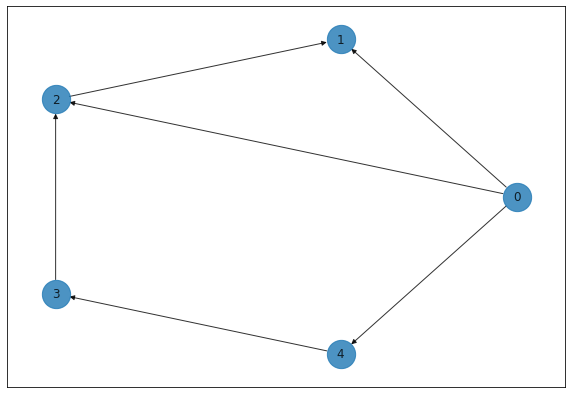

In [2]:
# Initialize directed 
G = nx.DiGraph()

# Add nodes v_i
G.add_node(0)
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)

# Add edges e_j = (v_k, v_l). Tail is v_k and head is v_l.
G.add_edge(0, 1)
G.add_edge(2, 1)
G.add_edge(3, 2)
G.add_edge(4, 3)
G.add_edge(0, 4)
G.add_edge(0, 2)

# Assign positions to the nodes in the graph
gu.assign_node_position(G)

# Plot graph
gu.plot_directed_graph(G, show_plot=True)

## Initial conditions and time parameters

In [11]:
# Concentration equal to zero on all nodes except on node 4
initial_conditions = np.zeros(G.number_of_nodes())
initial_conditions[4] = 1

# Time parameters
T = 8  # final time
dt = 0.01  # time step
times = list(np.linspace(0, T, int(T/dt)+1))  # times

## Operators

In [12]:
# Construct the velocity matrix
edge_velocities = np.ones(G.number_of_edges())
velocity_matrix = do.velocity_matrix(edge_velocities)

# Obtain the divergence
divergence = do.divergence_operator(G)

# Obtain the modified gradient operator
modified_gradient = do.modified_gradient_operator(do.gradient_operator(G))

# Obtain advection Laplacian
advection_laplacian = - divergence * velocity_matrix * modified_gradient

# Identity matrix
identity = np.eye(G.number_of_nodes())

# Matrix of coefficients
A = identity + dt * advection_laplacian

## Solve system of ODEs

In [13]:
# Create plotly node and edge traces
edge_trace = gu.get_edge_trace(G)
node_trace = gu.get_node_trace(G, color_vals=initial_conditions, size=40)
data = [[edge_trace, node_trace]]

u0 = initial_conditions

for t in times[1:]:

    # Solve linear system
    u = np.linalg.solve(A.A, u0)   
    
    # Update node trace
    node_trace = gu.get_node_trace(G, color_vals=u, size=40)
    data.append([edge_trace, node_trace])
    
    # Update value for next time step
    u0 = u

## Show animation

In [14]:
fig = gu.animate_graph(data, times, show_animation=True, title="Advection on a graph")